## Part 1: Kernelized Linear Regression

(200, 5)
Training Error : 1600.2968031672294
Validation Error : 1751.8387330251512


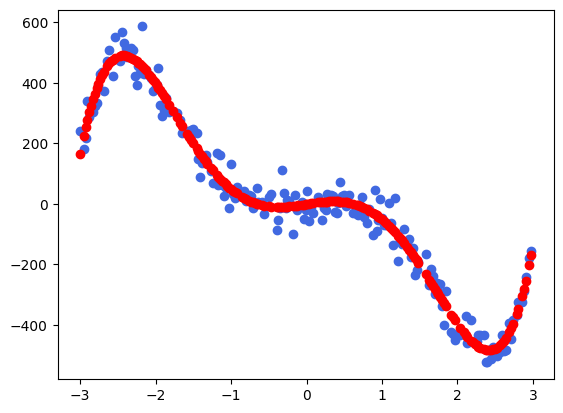

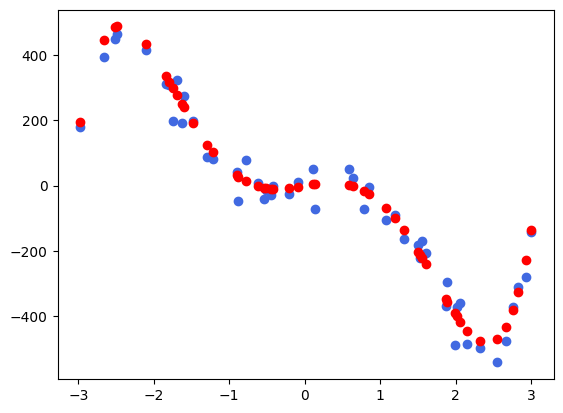

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# -----------------------------
# 1. Generate Nonlinear Training Data using a 5th order polynomial with sharp curvature
#    Here, we use: y = 10*x^5 - 100*x^3 + 40*x, which has two minima and two maxima with sharp transitions.
# -----------------------------
np.random.seed(42)

# Generate 250 evenly spaced points between -3 and 3 for a smooth curve and shuffle them
X_all = np.linspace(-3, 3, 250).reshape(-1, 1)
np.random.shuffle(X_all)

# Split into 200 training points and 50 validation points
X_train = X_all[:200]
y_train = 10 * X_train**5 - 100 * X_train**3 + 40 * X_train + np.random.randn(200, 1) * 40

X_val = X_all[200:]
y_val = 10 * X_val**5 - 100 * X_val**3 + 40 * X_val + np.random.randn(50, 1) * 40

# -----------------------------
# 2. TO DO: Linear Regression with Manually Created Polynomial Features (degree 5)
def phi(x):
    feature = []
    for i in x:
        k = i
        curr_feature = []
        for j in range(5):
            curr_feature.append(k)
            k = k * i
        feature.append(curr_feature)
    return feature

X_train_feature = np.array(phi(X_train))[:,:,0]
print(X_train_feature.shape)
X_val_feature = np.array(phi(X_val))[:,:,0]

def MSE(y_pred, y_val):
    return np.mean(np.square(y_val - y_pred))

reg = LinearRegression().fit(X_train_feature, y_train)
y_pred_train = reg.predict(X_train_feature)
y_pred_test = reg.predict(X_val_feature)
# -----------------------------

# -----------------------------
# 3. TO DO: Plot the Data and the Fit, and Print the Training and Validation Errors (MSE)
training_error = MSE(y_pred_train, y_train)
validation_error = MSE(y_pred_test, y_val)

print("Training Error :", training_error)
print("Validation Error :", validation_error)

def plotfit(X, y, y_pred):
    plt.scatter(X, y, color="royalblue")
    plt.scatter(X, y_pred, color="red")
    plt.show()

plotfit(X_train, y_train, y_pred_train)
plotfit(X_val, y_val, y_pred_test)
# -----------------------------



Training Error : 10185.229266684506
Validation Error : 11508.14767841698


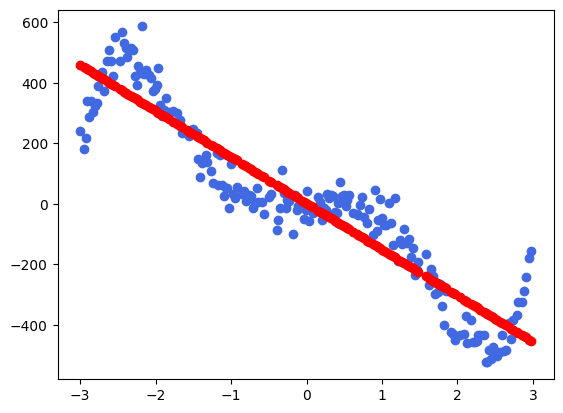

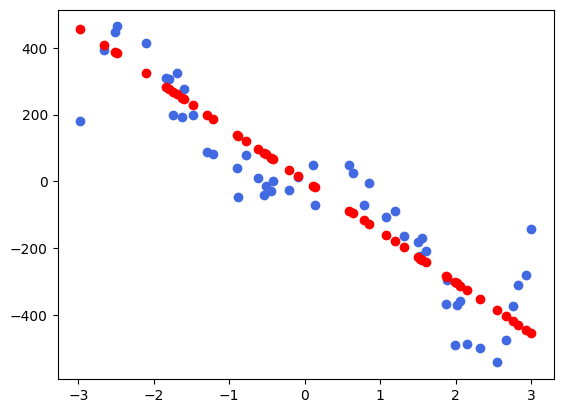

In [2]:
reg = LinearRegression().fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_val)
# -----------------------------

# -----------------------------
# 3. TO DO: Plot the Data and the Fit, and Print the Training and Validation Errors (MSE)
training_error = MSE(y_pred_train, y_train)
validation_error = MSE(y_pred_test, y_val)

print("Training Error :", training_error)
print("Validation Error :", validation_error)

def plotfit(X, y, y_pred):
    plt.scatter(X, y, color="royalblue")
    plt.scatter(X, y_pred, color="red")
    plt.show()

plotfit(X_train, y_train, y_pred_train)
plotfit(X_val, y_val, y_pred_test)

## Part 2: Logistic Regression and SoftMax Regression on MNIST 

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression

X_mnist, y_mnist = fetch_openml("mnist_784",version=1,return_X_y=True,as_frame=False)

#make the data into usable form, normalization
y_mnist = y_mnist.astype('int')
X_mnist = X_mnist/255.0

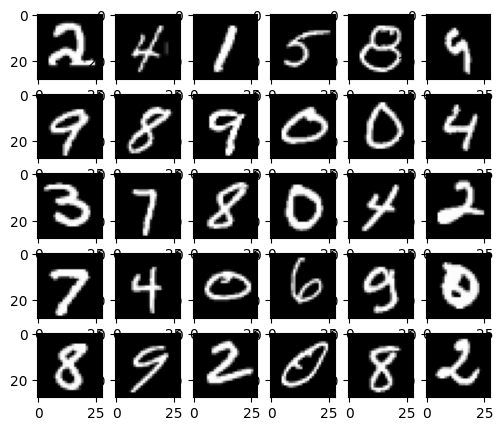

In [4]:
def display_grid(list_conn, num_col):
    num_row = int(list_conn.shape[0]/num_col)

    fig, axes = plt.subplots(num_row, num_col, figsize=(num_col,num_row))
    for i in range(num_col*num_row):
        #ax.set_title("Conn. matrix (log scale), S = "+str(i+1), fontsize=12)
        ax = axes[i%num_row, int(i/num_row)]
        full_im = ax.imshow(list_conn[i].reshape((28,28)), cmap='gray')

    #make room for the colourbar on the right and plot it
    fig.subplots_adjust(right=0.88)
    plt.show()

display_grid(X_mnist[np.random.choice(np.arange(X_mnist.shape[0]), 30)], 6)

In [5]:
def plot_curve1(pts, x_label, y_label, title):
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  index = np.arange(1, len(pts)+1, 1)
  plt.plot(index, pts, '-b')

  plt.show()

def calculate_accuracy(y_act, y_pred):
    """Calculate accuracy given actual and predicted labels."""
    y_act = np.asarray(y_act).flatten()
    y_pred = np.asarray(y_pred).flatten()
    return np.sum(y_act == y_pred) / len(y_act)

In [6]:
def stratified_train_test_logistic(X, y, nclasses=10):
    np.random.seed(24)   #so that the same split is obtained always
    list_train = []
    list_cv = []
    list_test = []
    for label in np.unique(y):
        indices = np.where(y==label)[0]
        np.random.shuffle(indices)
        list_train += list(indices[0:int(len(indices)*6/7)])
        list_test += list(indices[int(len(indices)*6/7) : ])

    X_train_logistic = X[list_train]
    y_train_logistic = y[list_train]

    X_test_logistic = X[list_test]
    y_test_logistic = y[list_test]

    return X_train_logistic, y_train_logistic, X_test_logistic, y_test_logistic

X_train_logistic, y_train_logistic, X_test_logistic, y_test_logistic = stratified_train_test_logistic(X_mnist, y_mnist, nclasses=10)

In [7]:
print(X_train_logistic.shape, y_train_logistic.shape, X_test_logistic.shape, y_test_logistic.shape)

(59996, 784) (59996,) (10004, 784) (10004,)


In [8]:
accuracies = []
def digit_classifier(digit):
    y_train_changed = np.where(y_train_logistic == digit, 1, 0)
    y_test_changed = np.where(y_test_logistic == digit, 1, 0)

    clf = LogisticRegression(random_state=0, max_iter=200).fit(X_train_logistic, y_train_changed)
    accuracies.append(clf.score(X_test_logistic, y_test_changed))
    print("Accuracy for",digit,"is",accuracies[-1])

for i in range(10):
    digit_classifier(i)

Accuracy for 0 is 0.991703318672531
Accuracy for 1 is 0.9932027189124351
Accuracy for 2 is 0.9812075169932027
Accuracy for 3 is 0.9750099960015993
Accuracy for 4 is 0.9836065573770492
Accuracy for 5 is 0.975109956017593
Accuracy for 6 is 0.9875049980007997
Accuracy for 7 is 0.9855057976809276
Accuracy for 8 is 0.9579168332666933
Accuracy for 9 is 0.9634146341463414


In [9]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

# With gradient descent
def loss_softmax(X, W, Y):
    
    # TO DO: Get the predicted Y_hat for the current W. dim: R^(n×k)
    Y_hat = softmax(np.dot(X, W))
    # TO DO: cross-entropy loss L
    L = -1 * np.mean(Y * np.log(Y_hat))
    return L

def gradient_softmax(X, W, Y):
    # TO DO: Vectorized implementation of softmax gradient
    # dim: R^(d×k)
    grad = -1 * X.T @ (Y - softmax(np.dot(X,W))) / X.shape[0]
    return grad

def learn_params_softmax(X, Y, lr, num_epochs):
    """
    Learn softmax regression parameters using gradient descent.

    X: Feature matrix (n×d)
    Y: One-hot encoded labels (n×k)
    lr: Learning rate
    num_epochs: Number of epochs

    Returns:
    W: Learned weight matrix
    loss: List of loss values over epochs
    """
    # TO DO: Initialize weights
    
    W = np.random.random(size=(X.shape[1], Y.shape[1]))

    loss = []
    for _ in range(num_epochs):
        L = loss_softmax(X, W, Y)

        loss.append(L)

        W = W - lr * gradient_softmax(X, W, Y)
        if (_ % 50 == 0):
            print("Epoch: ", _, "\t Loss: ", L)
        # TO DO: Calculate loss and append to loss list
        # TO DO: Gradient update
    
    return W, loss

In [10]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, 10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y

Epoch:  0 	 Loss:  0.5075682055755867
Epoch:  50 	 Loss:  0.058973819894702476
Epoch:  100 	 Loss:  0.0472258705921249
Epoch:  150 	 Loss:  0.042418470688912135
Epoch:  200 	 Loss:  0.03964278470101182
Epoch:  250 	 Loss:  0.03777656083303779
Epoch:  300 	 Loss:  0.03640920950497
Epoch:  350 	 Loss:  0.035350711238083345
Epoch:  400 	 Loss:  0.034499365873861994
Epoch:  450 	 Loss:  0.03379506766660941
Epoch:  500 	 Loss:  0.033199654066086874
Epoch:  550 	 Loss:  0.03268754940669042
Epoch:  600 	 Loss:  0.032240874922780736
Epoch:  650 	 Loss:  0.031846701433437014
Epoch:  700 	 Loss:  0.031495414650504414
Epoch:  750 	 Loss:  0.031179696158771354
Epoch:  800 	 Loss:  0.030893863221165198
Epoch:  850 	 Loss:  0.03063342691377008
Epoch:  900 	 Loss:  0.03039478802107353
Epoch:  950 	 Loss:  0.03017502260656568


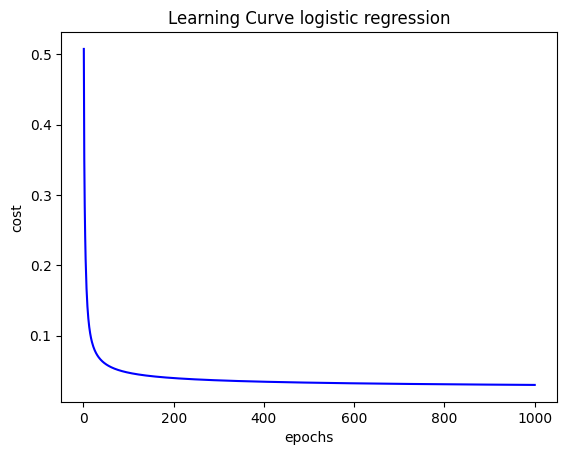

In [11]:
def train_test_softmax(X_train, y_train):
    # TO DO: Convert to one-hot encoding
    # TO DO: Create a zero matrix of shape (n_samples, n_classes)
    Y = np.array(one_hot(y_train))
    # TO DO: Assign 1 to the correct class indices
    # TO DO: add 1s to X_train to allow bias in regression
    ones = np.ones(X_train.shape[0]).reshape(-1, 1)
    X_train = np.hstack((ones, X_train))

    epochs = 1000
    w, loss = learn_params_softmax(X_train, Y, 0.5, epochs)

    plot_curve1(loss, "epochs", "cost", "Learning Curve logistic regression")
    return w

w = train_test_softmax(X_train_logistic, y_train_logistic)

Accuracy on test set by Logistic (multiclass) regression  0.91
[[9.420e+02 0.000e+00 4.000e+00 3.000e+00 1.000e+00 1.600e+01 7.000e+00
  3.000e+00 8.000e+00 3.000e+00]
 [0.000e+00 1.097e+03 5.000e+00 2.000e+00 1.000e+00 5.000e+00 1.000e+00
  2.000e+00 1.200e+01 1.000e+00]
 [7.000e+00 1.100e+01 8.700e+02 2.200e+01 2.000e+01 2.000e+00 1.900e+01
  1.300e+01 2.800e+01 7.000e+00]
 [5.000e+00 4.000e+00 2.000e+01 9.140e+02 2.000e+00 3.800e+01 2.000e+00
  6.000e+00 1.800e+01 1.200e+01]
 [3.000e+00 5.000e+00 3.000e+00 3.000e+00 9.110e+02 3.000e+00 8.000e+00
  2.000e+00 6.000e+00 3.100e+01]
 [1.600e+01 5.000e+00 6.000e+00 4.000e+01 8.000e+00 7.690e+02 1.900e+01
  3.000e+00 2.800e+01 8.000e+00]
 [5.000e+00 2.000e+00 1.100e+01 0.000e+00 1.200e+01 1.600e+01 9.310e+02
  2.000e+00 2.000e+00 2.000e+00]
 [1.000e+00 7.000e+00 1.100e+01 1.000e+00 8.000e+00 2.000e+00 0.000e+00
  9.660e+02 5.000e+00 4.100e+01]
 [7.000e+00 1.200e+01 8.000e+00 3.300e+01 6.000e+00 3.400e+01 5.000e+00
  3.000e+00 8.520e+02 1.5

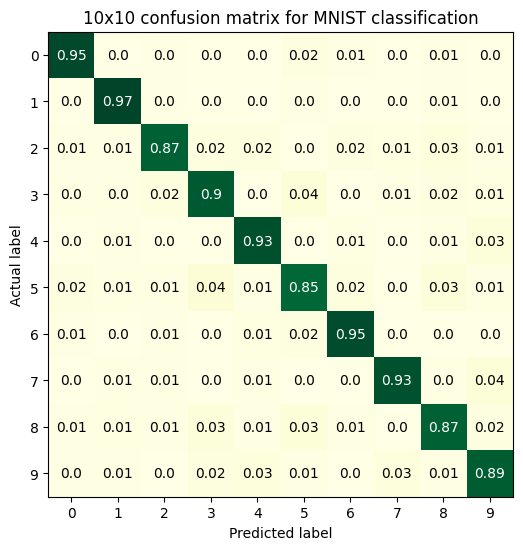

In [12]:

def display_confusion_matrix(y, y_pred, n, title_="10x10 confusion matrix for MNIST classification", labels_ = np.arange(10)):
    confusion_matrix = np.zeros((n, n))
    n_sample_per_class = np.zeros((n, 1))
    for i in range(n):
        n_sample_per_class[i, 0] = np.sum(y == i)
    for i in range(len(y)):#range(y.shape[0]):
        # print(y[i], y_pred[i])
        confusion_matrix[y[i], y_pred[i]] += 1

    print (confusion_matrix)

    confusion_matrix = confusion_matrix / n_sample_per_class

    fig, ax = plt.subplots(figsize=(6, 8))
    heatmap = ax.imshow(confusion_matrix, cmap="YlGn")

    ax.set_xticks(np.arange(n), labels=labels_)
    ax.set_yticks(np.arange(n), labels=labels_)
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.title(title_)
    for i in range(n):
        for j in range(n):
            if i == j:
                col = 'w'
            else:
                col = 'k'
            text = ax.text(j, i, np.round(confusion_matrix[i, j], 2), ha="center", va="center", color=col)
    return confusion_matrix

def display_test_results(W, X, y):
    # TO DO: Add 1s to X to allow bias in regression
    # TO DO: Convert to one-hot encoding
    # TO DO: Create a zero matrix of shape (n_samples, n_classes)
    # Y = one_hot(y)
    # TO DO: Assign 1 to the correct class indices
    ones = np.ones(X.shape[0]).reshape(-1, 1)
    X = np.hstack((ones, X))


    # TO DO: Get the probabilities for each class of the test set (X)
    # TO DO: Decide the predicted class label
    pred_y = np.argmax(softmax(np.dot(X, W)), axis = 1)

    # print(Y.shape, pred_y.shape)

    # print ()
    print("Accuracy on test set by Logistic (multiclass) regression ", np.round(calculate_accuracy(y.T, pred_y), 2))

    #display the contingency table
    return display_confusion_matrix(y.T, pred_y, len(np.unique(y)))



confusion_matrix = display_test_results(w, X_test_logistic, y_test_logistic)



In [13]:
for digit in range(10):
    print(f"Accuracy for digit {digit} with: ")
    print("Softmax: ", confusion_matrix[digit, digit])
    print("Without Softmax: ", accuracies[digit])
    print()

Accuracy for digit 0 with: 
Softmax:  0.9544072948328267
Without Softmax:  0.991703318672531

Accuracy for digit 1 with: 
Softmax:  0.9742451154529307
Without Softmax:  0.9932027189124351

Accuracy for digit 2 with: 
Softmax:  0.8708708708708709
Without Softmax:  0.9812075169932027

Accuracy for digit 3 with: 
Softmax:  0.8952007835455436
Without Softmax:  0.9750099960015993

Accuracy for digit 4 with: 
Softmax:  0.9343589743589743
Without Softmax:  0.9836065573770492

Accuracy for digit 5 with: 
Softmax:  0.852549889135255
Without Softmax:  0.975109956017593

Accuracy for digit 6 with: 
Softmax:  0.9471007121057986
Without Softmax:  0.9875049980007997

Accuracy for digit 7 with: 
Softmax:  0.927063339731286
Without Softmax:  0.9855057976809276

Accuracy for digit 8 with: 
Softmax:  0.8738461538461538
Without Softmax:  0.9579168332666933

Accuracy for digit 9 with: 
Softmax:  0.8893360160965795
Without Softmax:  0.9634146341463414

